# Pmlotting Spatial Data with Python and Calculating distances between points in Geodataframe

In [19]:
import pandas as pd
import geopandas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
schools_malika = pd.read_excel('D:\Research\PROJECT\pyexeriences\Geospatial experiences\schools_in_malika_with_latlon.xlsx')


In [3]:
schools_malika.head()

,Unnamed: 0,school_name,addresses,coordinates,phone_contacts,longitude,latitude
0,0,"Institut Biblique, Malika Sénégal","Malika, Senegal","-17.337383, 14.796181",NaN,-17.337383,14.796181
1,1,Elementary School Malika Plage,"Malika, Senegal","-17.337383, 14.796181",NaN,-17.337383,14.796181
2,2,Keur Serigne Touba,"Malika Plage, Senegal","-17.3363701, 14.7963104",+221 76 002 83 91,-17.336370,14.796310
3,3,Gs Cholaye,"Malika plage, Malika, Senegal","-17.3376452, 14.8007407",+221 77 381 32 10,-17.337645,14.800741
4,4,School Houddalah,"Malika- Cite Sonatel Road, Senegal","-17.338977, 14.785753",NaN,-17.338977,14.785753


In [4]:
# removing 'Unnamed: 0' column
schools_malika.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
schools_malika.columns

Index(['school_name', 'addresses', 'coordinates', 'phone_contacts',
       'longitude', 'latitude'],
      dtype='object')

In [6]:
# Check the last rows
schools_malika.tail()

,school_name,addresses,coordinates,phone_contacts,longitude,latitude
25,French School,"Keur Massar, Senegal","-17.310605, 14.7891319",NaN,-17.310605,14.789132
26,School Tinder Ndiaye Deguene,Senegal,"-17.3833717, 14.7778211",NaN,-17.383372,14.777821
27,School Group Galle Nanondiral,"Dakar, Senegal","-17.347285, 14.787532",NaN,-17.347285,14.787532
28,Small School Soldats,Senegal,"-17.3439065, 14.7710441",+221 33 872 82 57,-17.343906,14.771044
29,Keur Serigne Touba,"Unnamed Road, Senegal","-17.3461828, 14.7894696",NaN,-17.346183,14.789470


In [7]:
# The shape of our data
schools_malika.shape

(30, 6)

## Plotting a shapefile

In [9]:
geom_schools = geopandas.GeoDataFrame(schools_malika, geometry=geopandas.points_from_xy(schools_malika.longitude, schools_malika.latitude))


In [10]:
geom_schools.head()

,school_name,addresses,coordinates,phone_contacts,longitude,latitude,geometry
0,"Institut Biblique, Malika Sénégal","Malika, Senegal","-17.337383, 14.796181",NaN,-17.337383,14.796181,POINT (-17.33738 14.79618)
1,Elementary School Malika Plage,"Malika, Senegal","-17.337383, 14.796181",NaN,-17.337383,14.796181,POINT (-17.33738 14.79618)
2,Keur Serigne Touba,"Malika Plage, Senegal","-17.3363701, 14.7963104",+221 76 002 83 91,-17.336370,14.796310,POINT (-17.33637 14.79631)
3,Gs Cholaye,"Malika plage, Malika, Senegal","-17.3376452, 14.8007407",+221 77 381 32 10,-17.337645,14.800741,POINT (-17.33765 14.80074)
4,School Houddalah,"Malika- Cite Sonatel Road, Senegal","-17.338977, 14.785753",NaN,-17.338977,14.785753,POINT (-17.33898 14.78575)


In [14]:
#  Checking the data type of both our data
print(schools_malika.dtypes);
print('The following data are differents:')
print(geom_schools.dtypes)

school_name         object
addresses           object
coordinates         object
phone_contacts      object
longitude          float64
latitude           float64
geometry          geometry
dtype: object
The following data are differents:
school_name         object
addresses           object
coordinates         object
phone_contacts      object
longitude          float64
latitude           float64
geometry          geometry
dtype: object


In [15]:
# Dropping the coordinates column in our geom_school data
geom_schools.drop('coordinates', axis=1, inplace=True)


In [16]:
geom_schools.columns

Index(['school_name', 'addresses', 'phone_contacts', 'longitude', 'latitude',
       'geometry'],
      dtype='object')

<AxesSubplot:>

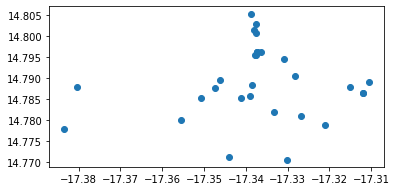

In [17]:
# plotting schools locations
geom_schools.plot()

<AxesSubplot:>

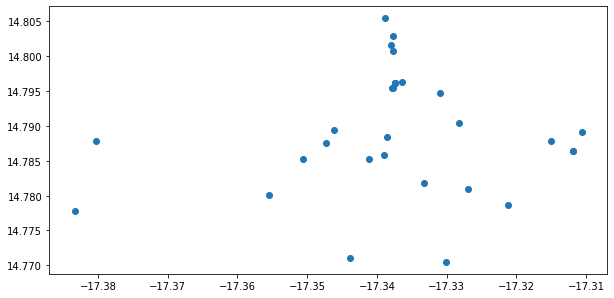

In [20]:
fig, ax = plt.subplots(figsize = (10,10))
geom_schools.plot(ax=ax)

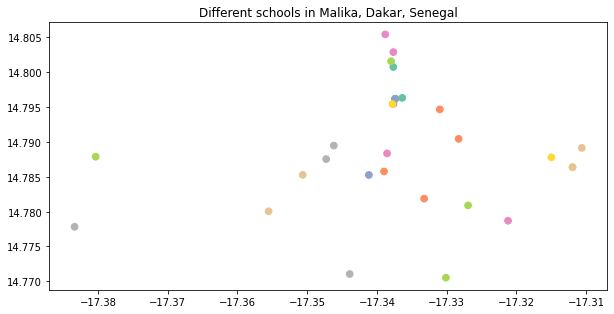

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the data and add a legend
geom_schools.plot(categorical=True,
                         legend=True,
                         figsize=(10, 6),
                         markersize=45,
                         cmap="Set2",
                         ax=ax)
# Add a title
ax.set_title('Different schools in Malika, Dakar, Senegal')

plt.show()

In [23]:
import contextily as ctx

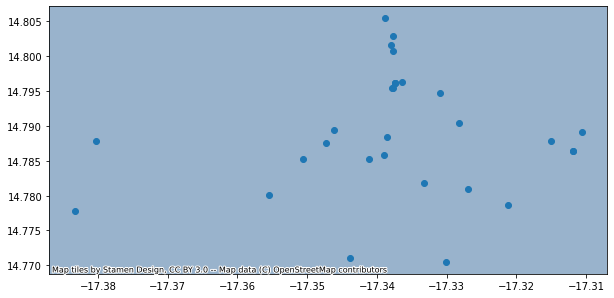

In [34]:
ctx.add_basemap(geom_schools.plot(figsize=(10,10)), zoom=8)

## Coordinate Reference System CRS

Let's check if our data contains a crs

In [36]:
print(geom_schools.crs)

None


We can insert a crs for our data easily with the following method

In [37]:
geom_schools.crs = 'epsg:4326'

In [38]:
geom_schools.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

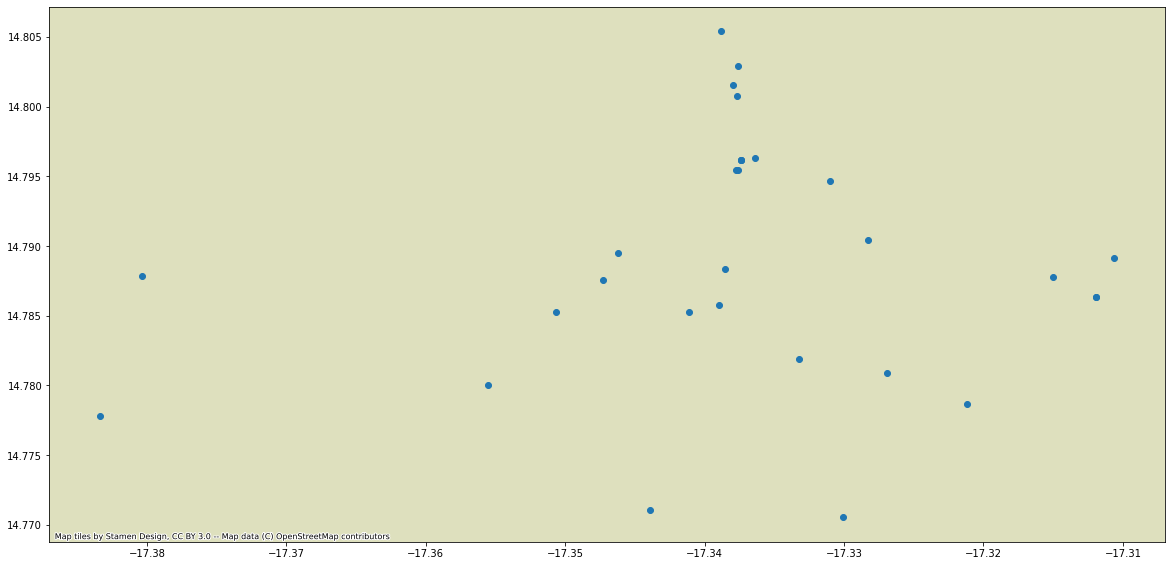

In [50]:
ctx.add_basemap(geom_schools.plot(figsize=(20,12)), zoom = 17)

In [54]:
import osmnx as ox
dakar_region = ox.geocode_to_gdf('Dakar, Senegal')

In [55]:
dakar_region

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"MULTIPOLYGON (((-17.54902 14.74736, -17.54584 ...","Dakar, Senegal",14.887899,14.590074,-17.12061,-17.549025


<AxesSubplot:>

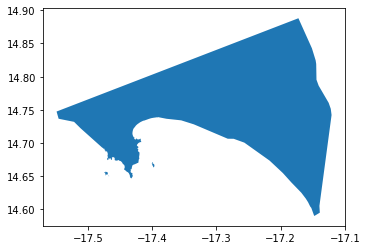

In [56]:
dakar_region.plot()

## Visualizing Shools

<AxesSubplot:>

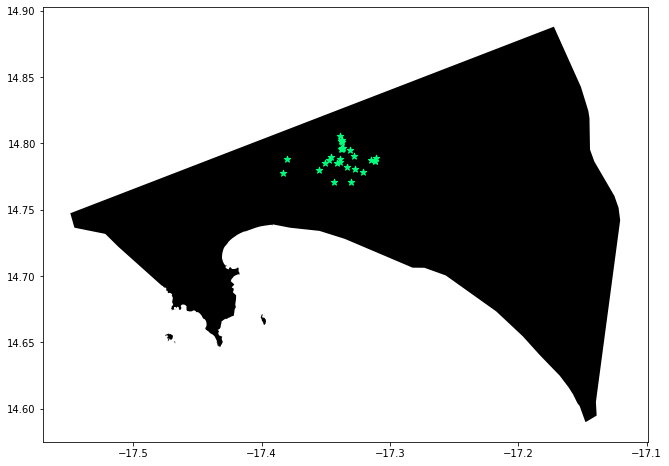

In [60]:
# Plot point locations
fig, ax = plt.subplots(figsize=(12, 8))

dakar_region.plot(figsize=(10, 5), color='k',
               ax=ax)
# Add city locations
geom_schools.plot(ax=ax, 
                    color='springgreen', 
                    marker='*',
                    markersize=45)

We can see some schools in Malika in the Malika district area

Most schools are located on the main road, that's absolutely a very dangerous for kids even there will be a trafic controler. We can see a concentration of schools in the road that leading to the high way

In [63]:
data = geom_schools.copy()

In [66]:
g1 = data[data['addresses'].str.contains('Malika')]
g2 = data[data['addresses'].str.contains('Malika') == False]

<AxesSubplot:>

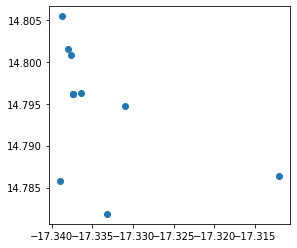

In [68]:
g1.plot()

<AxesSubplot:>

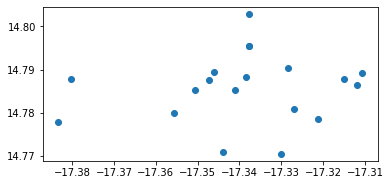

In [69]:
g2.plot()

In [79]:
g1 = g1.to_crs({'init': 'epsg:4326'})
g2 = g2.to_crs({'init': 'epsg:4326'})


d:\programm files\python 3 8 6\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [80]:
g2.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [85]:
L1 = [14.795562203226474, -17.337780327723806]

## Calculate Distance between schools

The main school in Malika is the elementary school Seydi Anta Gadiaga, everyone knows it there, so let's find a distance from that school to every other school around Malika within our dataset

In [86]:
data['distance'] = data[['longitude', 'latitude']].sub(np.array(L1)).pow(2).sum(1).pow(0.5)


In [87]:
data

,school_name,addresses,phone_contacts,longitude,latitude,geometry,distance
0,"Institut Biblique, Malika Sénégal","Malika, Senegal",NaN,-17.337383,14.796181,POINT (-17.33738 14.79618),45.443565
1,Elementary School Malika Plage,"Malika, Senegal",NaN,-17.337383,14.796181,POINT (-17.33738 14.79618),45.443565
2,Keur Serigne Touba,"Malika Plage, Senegal",+221 76 002 83 91,-17.336370,14.796310,POINT (-17.33637 14.79631),45.442941
3,Gs Cholaye,"Malika plage, Malika, Senegal",+221 77 381 32 10,-17.337645,14.800741,POINT (-17.33765 14.80074),45.446975
4,School Houddalah,"Malika- Cite Sonatel Road, Senegal",NaN,-17.338977,14.785753,POINT (-17.33898 14.78575),45.437319
5,Daara De Malika,"Dakar, Senegal",+221 77 463 39 65,-17.328278,14.790430,POINT (-17.32828 14.79043),45.433061
6,Institution Saint Louis Marie Grignion De Malika,"Malika, Senegal",+221 33 878 09 33,-17.330980,14.794662,POINT (-17.33098 14.79466),45.437964
7,School Franco Arabic Abdoulaye Malick,"Malika, Senegal",+221 77 382 60 40,-17.333222,14.781860,POINT (-17.33322 14.78186),45.430497
8,Course Saint-Vallier,"Route de la plage, Malika, Senegal",+221 77 839 17 92,-17.337383,14.796181,POINT (-17.33738 14.79618),45.443565
9,Elementary School Seydi Anta Gadiagade Malika,"Dakar, Senegal",NaN,-17.337636,14.795445,POINT (-17.33764 14.79545),45.443224
